# Amazon Reviews Sentiment Analysis

Data შეიცავს 3 600 000 მონაცემს. რივიუების უდიდესი რაოდენობა არის ინგლისური. ასევე ვხვდებით ესპანურ რივიუებსაც მაგრამ აღსანიშნავია, რომ არაინგლისურენოვანი რივიუები ძალიან ცოტაა.

თუ ჩვენ გვინდა, რომ არაინგლისური რივიუებიც გავითვალისწინოთ, გვაქვს რამდენიმე შესაძლო მიდგომა. პირველი არის, რომ რა იმბედინგის მომცემსაც გამოვიყენებთ, იყოს multilingual, რათა ერთი მოდელით შევძლო ყველა ენის მოცვა. მეორე არის, translator, რომელიც ყველა ენას გადაიყვანს ინგლისურზე. 

პირველ რიგში, ვთქვათ, რომ multilingual მოდელების გამოყენება ცუდი იდეაა, რადგან მათი იმბედინგები ინგლისური ენისთვის ისეთი კარგი არაა როგორიც monolongual-ის. რადგან სამიზნე მაინც ინგლისური ენაა, ეს ვარიანტი გამოვრიცხე. 
ასევე აღსანიშნავია, რომ ჩვენთვის ტრენინგი უფრო მნიშვნელოვანია და გვინდა, რომ ტრენინგის დროს გვქონდეს რაც შეიძლება სუფთა მონაცემები, ამიტომაც არაინგლისურენოვანების ნათარგმნებს არ გამოვიყენებთ ტრენინგის დროს, მაგრამ ინფერენსის დროს თუ შეგვხვდა, გადავთარგმნით და შევუშვებთ ჩვენს მოდელში. 

ამოცანის ამოხსნსას დავიწყებ სტანდარტულად. არ გამოვიყენებ პირდაპირ BERT-ს და ჯერ ვცდი შედარებით მარტივი მოდელების აგებას, რომელიც მექნება ბეისლაინად. პირველად დავიწყებ word2vec-ის extension-ით fasttext-ით. data, რომელიც მოცემული გვაქვს, პირდაპირ გამზადებულია fasttext-ითვის.

რა მოდელიც არ უნდა გამოვიყენოთ, ნებისმიერისთვის უმნიშვნელოვანესი როლი ექნება იმას, თუ როგორი data მიეწოდება კლასიფიკატორს, ამიტომაც საჭიროა ვიზრუნოთ მის გასუფთავებაზე. Data-ს preprocessing-ს გავაკეთებ შემდეგნაირად:

1. lowercase-ში გადაყვანა
2. ზედმეტი whitespace-ების წაშლა
3. აპოსტროფის მოშორება: i'd -> i would, i'll -> i will .....
4. ურლ-ების წაშლა, რომლებიც საკმაოდ გვხვდება
5. ემოჯების წაშლა
6. პუნქტუაციებისა და რიცხვების/ციფრების წაშლა
7. დუბლირებული ასოების წაშლა, თუ ისინი ზედიზედ 3 ჯერ გვხვდება: happyyyyy -> happy, Helloooooo -> hello
8. სპელ ჩეკერის გადატარება
9. word level მოდელის შემთხვევაში stop-word ებს წავშლი, რადგან შეიძლება მონაცემებში bias შემოიტანონ. sentence level მოდელების შემთხვევაში, მაგალითად როგორიცაა ბერტი, მაგ შემთხვევაში არ წავშლით, რადგან წინადადებების სტრუქტურა დაგვერღვევა.სტოპ ვორდების წაშლა ძალიან საფრთხილოა, მათი სია სპეციალურად შევადგინე რადგან ცხადია ყველას წაშლა ავნებდა კონტექსტს, მაგალითად თუ nltk-ს სტოპვორდებს გამოვიყენებდით მივიღებდით შედეგს: i did not like product -> like product, რაც ცხადია უარყოფითად აისახებოდა ყველაფერზე. სიაც, რომელიც მე შევადგინე, არ არის ძალიან დიდი რისერჩის შედეგად შედგენილი, მაგრამ რაც მთავარია კონტექსტს არ ავნებს.
10. ზოგადად, ლემატიზაცია და სტემინგი ხშირად აუმჯობეს ხოლმე პერფორმანსს word2vec-ის შემთხვევაში, რადგან შეიძლება wod2vecის ლექსიკონში იყოს სიტყვა cat და არ იყოს cats. cats-ისთვის out of vocab ვექტორის მინიჭებით ტყუილად ვკარგავთ ინფორმაციას და ხშირად უმჯობესია დავიყვანოთ ფუძეზე, რომელიც დიდი ალბათობით იქნება word2vec ის ლექსიკონში. fasttext ის შემთხვევაში, ამის პრობლემა ნაკლებად გვაქვს, ვინაიდან მასში გვხვდება ngram ული მოდელი, რომელიც ძალიან კარგად იჭერს სიტყვებს შორის ფონეტიკურ მსგავსებებს. შესაბამისად, ერთი სიტყვის გაგრძელებული ვარიანტი მაინც ვექტორულად ახლოს იქნება საწყის სიტყვასთან. თან ლემატიზაციამ შეიძლება ძალიან ავნოს სენტიმენტ ანალიზსს, ვინაიდან შეიძლება ფუძეზე დაყვანით დავკარგოთ სიტყვის სენტიმენტური კონტექსტი (close-closeness). 

In [5]:
import pandas
import numpy
import gcld3
from pycountry import languages
import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import translators as ts
from autocorrect import Speller
import re
import fasttext
import pandas as pd

Using Georgia server backend.


In [2]:
# returns text's language
# speed or FastText would be better

def detect_language(text):
    detector = gcld3.NNetLanguageIdentifier(min_num_bytes=0, 
                                        max_num_bytes=100000)
    result = detector.FindLanguage(text=text)
    if languages.get(alpha_2=result.language) == None:
        return None
    return languages.get(alpha_2=result.language).name

In [3]:
## translates to English

def translate(text):
    return ts.google(text, if_use_cn_host=True)

In [4]:
## removes urls

def remove_url(text):
    text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', 
                   text, flags=re.MULTILINE)  # to remove links that start with HTTP/HTTPS in the tweet
    text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', 
                   text, flags=re.MULTILINE) # to remove other url links
    return text

In [5]:
## removes emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [6]:
## removes numbers and punctuations

def remove_nums_punctuations(text): 
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    nums = '0123456789'
    return ''.join([i for i in text if i not in punctuations and i not in nums])

In [7]:
## converting apostrophe/short words in the better form

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
## removes extra white spaces

def remove_extra_whitespaces(text):
    return re.sub(' {2,}', ' ', text)

In [9]:
## removes specific stop words

def remove_stop_words(text):
    stop_words=['in','of','at','a','the, i, them, you, their, myself, our, ours, me, he, him, it, ours']
    tokens = text.split(' ')
    return ' '.join([word for word in tokens if word not in stop_words])

In [10]:
## spell checker

def spell_check(text):
    spell = Speller('en')
    s = ' '.join([spell(w) for w in text.split(' ')])
    return s

In [28]:
## removes duplicated chars. happyyyyyy -> hapy -> spell checker -> happy

def remove_duplicates(text):
    return re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', text)

In [11]:
## preprocessing

def preprocess(text):
    text = text.lower()
    text = remove_extra_whitespaces(text)
    text = decontracted(text)
    text = remove_url(text)
    text = remove_emoji(text)
    text = remove_nums_punctuations(text)
    text = remove_duplicates(text)
    text = spell_check(text)
    text = remove_stop_words(text)
    return text

In [2]:
TRAIN_PATH = '/Users/test/Downloads/archive/train.ft.txt'
TEST_PATH = '/Users/test/Downloads/archive/test.ft.txt'
NEW_TRAIN_PATH = '/Users/test/Downloads/archive/new_train.ft.txt'
NEW_TEST_PATH = '/Users/test/Downloads/archive/new_test.ft.txt'

# Data Preprocessing

პრეპროცესინს დიდი ხანი ჭირდება, ამიტომ 3 600 000-ის მაგივრად, 36 000-ზე ვატრენინგებდი და მასზე ვნახულობდი შედეგებს

In [13]:
train_txt = open(TRAIN_PATH, "r")
new_train_txt = open(NEW_TRAIN_PATH, "w")
p = 0.0
cnt = 0.0
for line in train_txt:
    if detect_language(line[10:]) == 'English':
        preprocessed = line[:10] + preprocess(line[10:])
        new_train_txt.write(preprocessed)
#     if cnt == 36000:
#         break
#     if cnt == 360*p:
#         print(str(p) + '%')
#         p+=1
#     cnt+=1
train_txt.close()
new_train_txt.close()

0.0%
1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%


In [16]:
test_txt = open(TEST_PATH, "r")
new_test_txt = open(NEW_TEST_PATH, "w")
cnt = 0
for line in test_txt:
#     if cnt == 5000:
#         break
#     cnt += 1
    review = line[10:]
    language = detect_language(review)
    if language == None:
        continue
    if language != 'English':
        review = translate(review)
    preprocessed = line[:10] + preprocess(review)
    new_test_txt.write(preprocessed)
test_txt.close()
new_test_txt.close()

# FastText

ngram-ების რაოდენობად ავირჩიე 2, არსებულ დეითაზე არჩეული მქონდა 3-იც მაგრამ არ მოიუცია იმდენად კარგი შედეგი, რომ დროდ და რესურსად ღირდეს. სინამდვილეში მისთვისაც განსხვავებული რეინჯების მოსინჯვა კრგი იქნებოდა

In [17]:
model = fasttext.train_supervised(NEW_TRAIN_PATH, wordNgrams=2)

In [18]:
def print_results(sample_size, precision, recall):
    precision   = round(precision, 2)
    recall      = round(recall, 2)
    print(f'{sample_size=}')
    print(f'{precision=}')
    print(f'{recall=}')

print_results(*model.test(NEW_TEST_PATH))

sample_size=4958
precision=0.9
recall=0.9


36000-5000-ისთვისაც კი, 0.9 პრესიჟენი კარგი შედეგია

In [46]:
def get_prediction(model, text):
    tp = model.predict(text)
    if tp[0][0] == '__label__2':
        return 'Positive'
    else:
        return 'Negative'

# txt -> pd.DataFrame

In [3]:
labels = []
reviews = []

test_labels = []
test_reviews = []

cnt1 = 0 
p1 = 0 
cnt2 = 0
p2 = 0
train_txt = open(NEW_TRAIN_PATH, 'r')
for line in train_txt:
    label = line[:10]
    review = line[10:]
    labels.append(label)
    reviews.append(review)
train_txt.close()

test_txt = open(NEW_TEST_PATH, 'r')
for line in test_txt:
    label = line[:10]
    review = line[10:]
    test_labels.append(label)
    test_reviews.append(review)
test_txt.close()

In [6]:
df = pd.DataFrame({'labels' : labels, 'reviews': reviews})
df.head(5)

labels                                            reviews
0  __label__2   tuning even for the nongamer this sound track...
1  __label__2   the best soundtrack ever to anything im readi...
2  __label__2   amazing this soundtrack is my favorite music ...
3  __label__2   excellent soundtrack i truly like this soundt...
4  __label__2   remember pull your jaw off the floor after he...

In [7]:
def fun(x):
    if x == '__label__2':
        return 1
    else:
        return 0

In [8]:
df.labels = df.labels.apply(fun)

# LSTM

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Bidirectional

In [23]:
max_f = 250
tokenizer = Tokenizer(num_words=max_f, split=' ')
tokenizer.fit_on_texts(df['reviews'].values)
x = tokenizer.texts_to_sequences(df['reviews'].values)
X = pad_sequences(x)

In [26]:
embed_dim = 16
lstm_out = 16

model = Sequential()
model.add(Embedding(max_f, embed_dim, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 187, 128)          256000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 187, 128)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 519,682
Trainable params: 519,682
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
test_df = pd.DataFrame({'labels': test_labels, 'reviews': test_reviews})
Le = LabelEncoder()
y = Le.fit_transform(df['labels'])
X_train = X
y_train = y

max_f = 200
tokenizer = Tokenizer(num_words=max_f, split=' ')
tokenizer.fit_on_texts(test_df['reviews'].values)
xx = tokenizer.texts_to_sequences(test_df['reviews'].values)
X_test = pad_sequences(xx)
y_test = Le.fit_transform(test_df['labels'])

In [28]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=5, batch_size=512)

Epoch 1/5
71/71 [==============================] - 305s 4s/step - loss: 0.5912 - accuracy: 0.6958 - val_loss: 0.7573 - val_accuracy: 0.5701
Epoch 2/5
71/71 [==============================] - 282s 4s/step - loss: 0.3367 - accuracy: 0.8567 - val_loss: 0.9417 - val_accuracy: 0.5313
Epoch 3/5
71/71 [==============================] - 282s 4s/step - loss: 0.2713 - accuracy: 0.8910 - val_loss: 1.1568 - val_accuracy: 0.5301
Epoch 4/5
71/71 [==============================] - 282s 4s/step - loss: 0.2515 - accuracy: 0.8991 - val_loss: 1.0491 - val_accuracy: 0.5337
Epoch 5/5
71/71 [==============================] - 326s 5s/step - loss: 0.2400 - accuracy: 0.9032 - val_loss: 0.9833 - val_accuracy: 0.5311


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


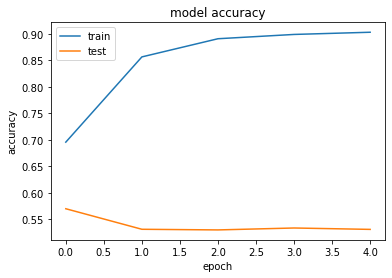

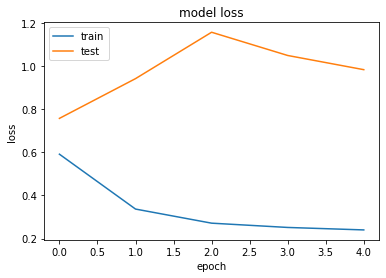

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ამ შემთხვევაში, ავაგე ლსტმ მოდელი რომელსაც დატა-დ მივაწოდე კერასის text_to_sequences ემბედინგური მოდელი, რომელიც მარტივად ჩანაცვლებადია ნებისმიერი სახის იმბედინგებით, როგორებიცაა GloVe, ან ნებისმიერი bert like მოდელის იმბედინგი. სხვა სიტყვებით რომ ვთქვათ, გვაქვს კლასიფაიერი, რომელსაც შეგვიძლია გამოვუცვალოთ ინფუთი, იმისდა მიხედვით როგორი იმბედინგი გვინდა.ვინაიდან ლსტმ-ს ასე თუ ისე უჭირს გრძელ სექვენსებზე ინფორმაციის შენახვა და დაჭერა, მოდელმაც ვერ დადო კარგი შედეგი. ცხადია, ამას ბევრად გამოასწორებდა ტრანსფორმერული კლასიფაიერის დაწერა. 
გამოთვლითი რესურსის შეზღუდვიდან გამომდინარე შემზღულდველი ფაქტორი იყო მონაცემების რაოდენობობა. უფრო მეტი მონაცემის შემთხვევაში, უფრო კარგად შეძლებდა მოდელი სწავლასა დაგანზოგადებას.

სამწუხაროდ embedding-ების ჩანაცვლება ვერ მოვახერხე რადგან clean data-ზე შემთხვევით overwrite გავაკეთე და მის შესადგენად რამდენიმე საათი დამჭირდა. ვარჩიე არ გამერისკა და გამომეგზავნა კოდი, რომელიც ვიცი, რომ მუშაობს. (glove-თი ჩანაცვლებული მქონდა, მინდოდა ბერტის გაწრთვნაც)

პრეპროცესინგი მთლიან დეითაზე საკმაოდ დიდ დროს მოითხოვს. ამიტომ 36000 იანზე მომიწია მოდელების გაწვრთნა. ამის გამო ვიზუალიზაციის და ანალიზის ასპექტი საკმაოდ გართულდა, რადგან მთლიან დეითას ვერ ვწერდი რამში. შესაბამისად ვერ ჩავატარე ექსპერიმენტებიც და გრაფიკული წარმოჩენა, რაც როგორც წესი, კარგი შედეგების მოულოდნელი საწინდარია ხოლმე.

კარგი ვიზუალიზაცია იქნებოდა რივიუების ტოკენების სიგრძის ჰისტოგრამა, რომელიც დამეხმარებოდა ლსტმ-ის სექვენსის სიგრძის ასარჩევად და აუთლაიერების გამოსარიცხათ.